# **Traffic Volume Analysis and Insights**

**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')

In [3]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [4]:
df.shape

(48204, 9)

In [5]:
df.isnull().sum()

traffic_volume         0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
dtype: int64

In [6]:
df.dtypes

traffic_volume           int64
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
dtype: object

**Taking a sample**

In [7]:
fraction_to_keep = 0.5

In [8]:
subset_data = df.sample(frac=fraction_to_keep, random_state=42)

In [9]:
subset_data.drop(columns=["date_time"], inplace=True)

# **Exploratory Data Analysis**

In [10]:
sns.set_style('whitegrid')

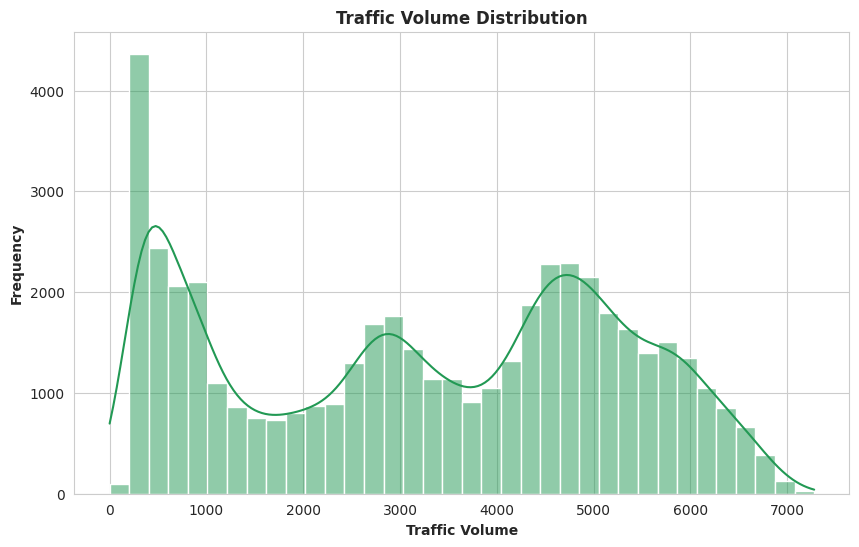

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="traffic_volume", kde=True, color = '#229954')
plt.title("Traffic Volume Distribution", fontweight='bold')
plt.xlabel("Traffic Volume", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
plt.show()

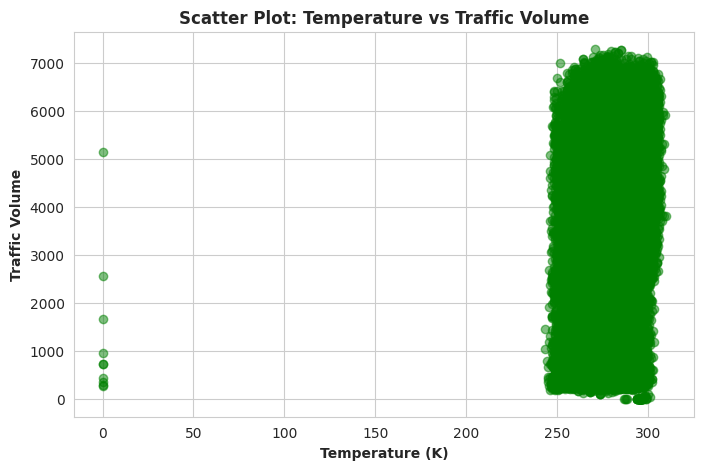

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(df['temp'], df['traffic_volume'], alpha=0.5, color='green')
plt.title('Scatter Plot: Temperature vs Traffic Volume', fontweight='bold')
plt.xlabel('Temperature (K)', fontweight='bold')
plt.ylabel('Traffic Volume', fontweight='bold')
plt.show()

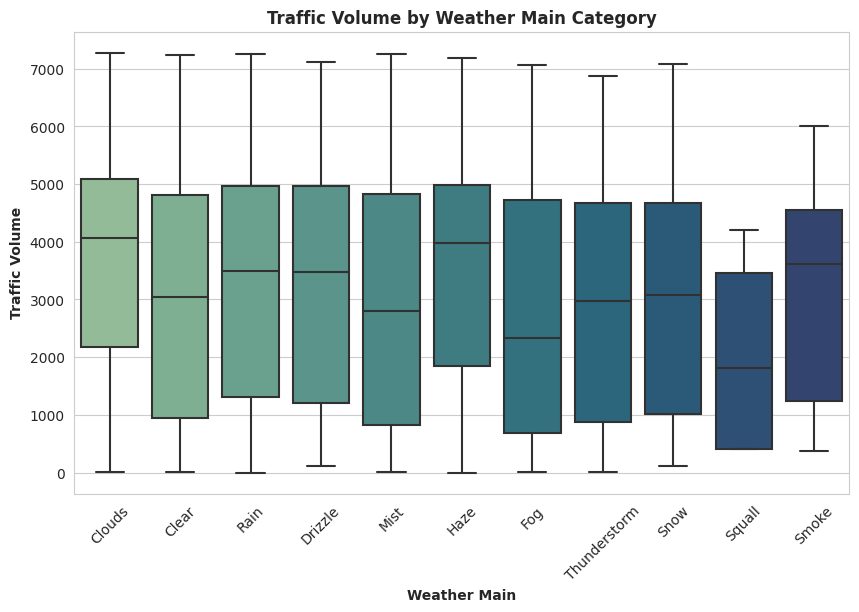

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_main', y='traffic_volume', data=df, palette='crest')
plt.title('Traffic Volume by Weather Main Category', fontweight='bold')
plt.xlabel('Weather Main', fontweight='bold')
plt.ylabel('Traffic Volume', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

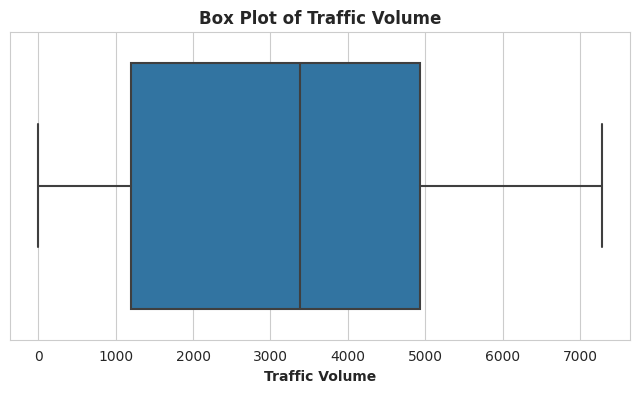

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['traffic_volume'])
plt.xlabel('Traffic Volume', fontweight='bold')
plt.title('Box Plot of Traffic Volume', fontweight='bold')
plt.show()

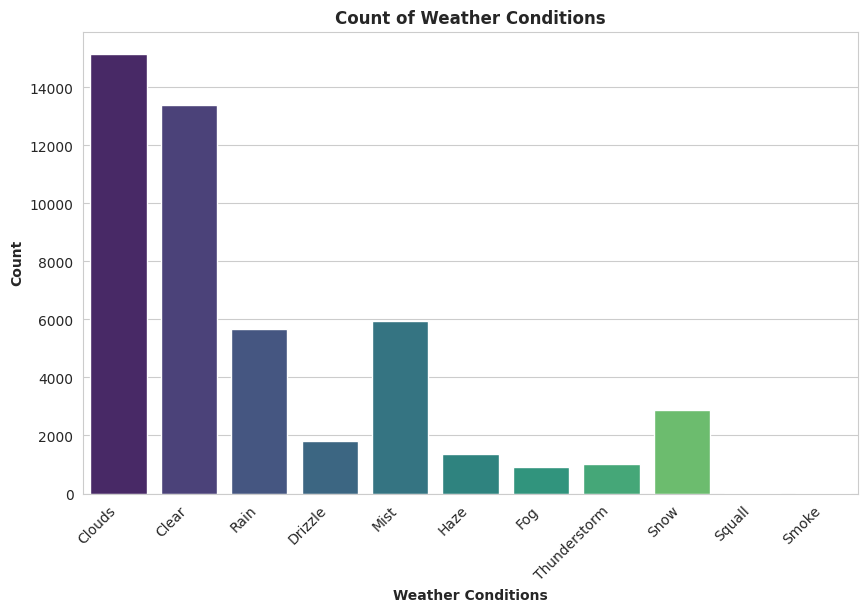

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather_main', palette='viridis')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Weather Conditions', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Count of Weather Conditions', fontweight='bold')
plt.show()

# **Statistical Tests**

In [26]:
from scipy import stats

**Hypothesis Test 1: Temperature and Traffic Volume**

In [36]:
# Null Hypothesis (H0): There is no significant difference in traffic volume between different temperature conditions.
# Alternative Hypothesis (H1): There is a significant difference in traffic volume between different temperature conditions.

In [32]:
temp_groups = [group[1] for group in df.groupby('temp')['traffic_volume']]

In [33]:
# Anova
f_statistic, p_value = stats.f_oneway(*temp_groups)

In [35]:
print("p-value:", p_value)

p-value: 4.996831844267056e-213


In [34]:
if p_value < 0.05:
    print("H0 rejected: There is a significant difference in traffic volume between different temperature conditions.")
else:
    print("H0 not rejected: There is no significant difference in traffic volume between different temperature conditions.")


H0 rejected: There is a significant difference in traffic volume between different temperature conditions.


**Hypothesis Test 2: Rainfall and Traffic Volume**

In [37]:
# Null Hypothesis (H0): Rainfall does not significantly affect traffic volume.
# Alternative Hypothesis (H1): Rainfall significantly affects traffic volume.

In [38]:
rainy_traffic = df[df['rain_1h'] > 0]['traffic_volume']
non_rainy_traffic = df[df['rain_1h'] == 0]['traffic_volume']

In [39]:
t_statistic, p_value = stats.ttest_ind(rainy_traffic, non_rainy_traffic)

In [41]:
print("p-value:", p_value)

p-value: 0.3245153532900298


In [40]:
if p_value < 0.05:
    print("H0 rejected: Rainfall significantly affects traffic volume.")
else:
    print("H0 not rejected: Rainfall does not significantly affect traffic volume.")


H0 not rejected: Rainfall does not significantly affect traffic volume.


**Hypothesis Test 3: Holiday and Traffic Volume**

In [45]:
# Null Hypothesis (H0): There is no significant difference in traffic volume between holidays and non-holidays.
# Alternative Hypothesis (H1): There is a significant difference in traffic volume between holidays and non-holidays.

In [46]:
holiday_traffic = df[df['holiday'] == 'None']['traffic_volume']
non_holiday_traffic = df[df['holiday'] != 'None']['traffic_volume']

In [47]:
t_statistic, p_value = stats.ttest_ind(holiday_traffic, non_holiday_traffic)


In [48]:
print("p-value:", p_value)

p-value: 4.412191266507329e-21


In [49]:
if p_value < 0.05:
    print("H0 rejected: There is a significant difference in traffic volume between holidays and non-holidays.")
else:
    print("H0 not rejected: There is no significant difference in traffic volume between holidays and non-holidays.")


H0 rejected: There is a significant difference in traffic volume between holidays and non-holidays.


In this project, we conducted an extensive exploratory data analysis (EDA) on a dataset containing information about traffic volume, environmental factors, and weather conditions. The dataset was first loaded and examined for any missing values, of which there were none. EDA visualizations were performed to gain insights into the distribution of traffic volume, the relationship between temperature and traffic volume, the impact of different weather conditions on traffic volume, and more.

We also carried out hypothesis testing to investigate the effects of temperature, rainfall, and holidays on traffic volume. The results of the hypothesis tests are as follows:

Temperature and Traffic Volume: We rejected the null hypothesis, indicating a significant difference in traffic volume between different temperature conditions.
Rainfall and Traffic Volume: The null hypothesis was not rejected, suggesting that rainfall does not significantly affect traffic volume.
Holiday and Traffic Volume: The null hypothesis was rejected, signifying a significant difference in traffic volume between holidays and non-holidays.
Overall, this analysis provides valuable insights into the factors that influence traffic volume, helping us better understand the dynamics of traffic patterns. These findings can be used to inform traffic management strategies and improve transportation systems.

**End Statement:**

This project concludes our exploration of traffic volume data, shedding light on various factors affecting traffic patterns. We hope that the insights gained from this analysis will contribute to better traffic management and enhance the efficiency of transportation systems.